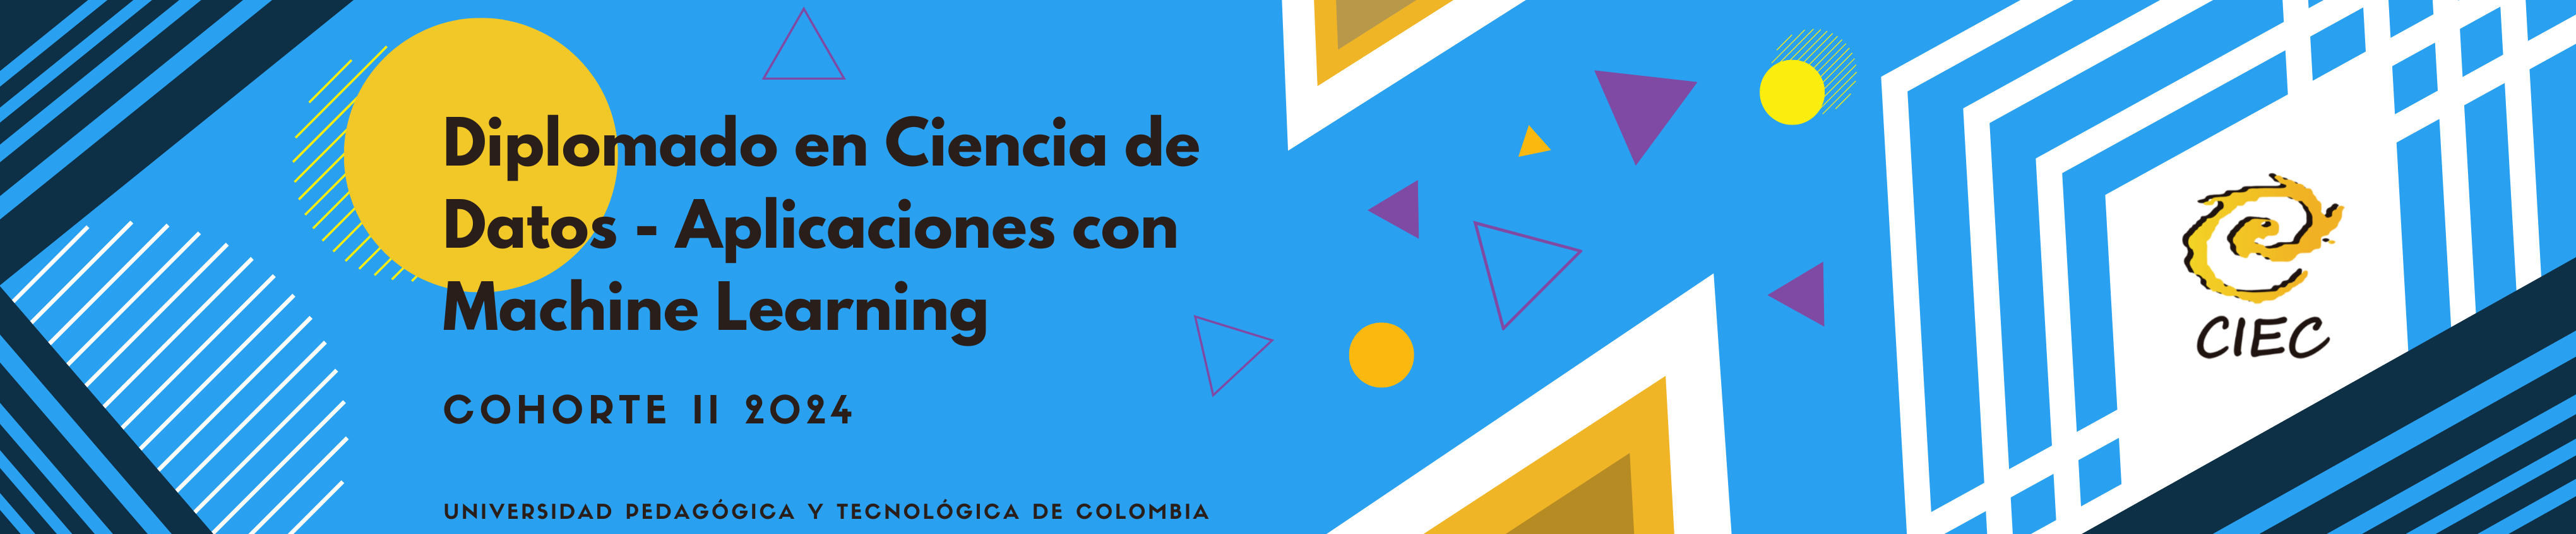

<!-- Main Title -->

**<h1 style="color: #FECB05; text-align: center;"> Regresión Logística I: Introducción a la Clasificación </h1>**

---

**<h2 style="color: #007ACC;">Autores</h2>**

- [Andrés Felipe Flórez Olivera](https://www.linkedin.com/in/felipeflorezo/)

---

# Problema de Clasificación

En un problema de clasificación, el objetivo es predecir una categoría o clase para un conjunto de datos dado. Se realiza de manera supervisada, dado que se asigna previamente una etiqueta, sobre la cual el modelo deberá ser entrenado y así predecir posteriores entradas.

Un ejemplo común es la clasificación de correos electrónicos como "spam" o "no spam".


## Dataset
Usaremos un dataset simple con dos características: el número de palabras clave y la cantidad de enlaces en el correo.

In [ ]:
import pandas as pd

# Creamos un dataset de ejemplo
data = {
    'num_palabras_clave': [10, 50, 3, 5, 70, 100],
    'num_enlaces': [0, 2, 0, 1, 4, 5],
    'es_spam': ['no', 'sí', 'no', 'no', 'sí', 'sí']
}

df = pd.DataFrame(data)
df

,num_palabras_clave,num_enlaces,es_spam
0,10,0,no
1,50,2,sí
2,3,0,no
3,5,1,no
4,70,4,sí
5,100,5,sí


### Recordemos qué es la visualización de datos...

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 8]

%matplotlib inline

In [ ]:
!gdown "1686zWPyz45ZY9hw-qpTfNKeHeNjGH2aV"

hp = pd.read_csv('house-prices.csv')
hp

Downloading...
From: https://drive.google.com/uc?id=1686zWPyz45ZY9hw-qpTfNKeHeNjGH2aV
To: /content/house-prices.csv
100% 3.87k/3.87k [00:00<00:00, 11.1MB/s]


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


<ipython-input-4-69fe5cbb9a31>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.countplot(data=hp, x='Neighborhood', palette='Paired')


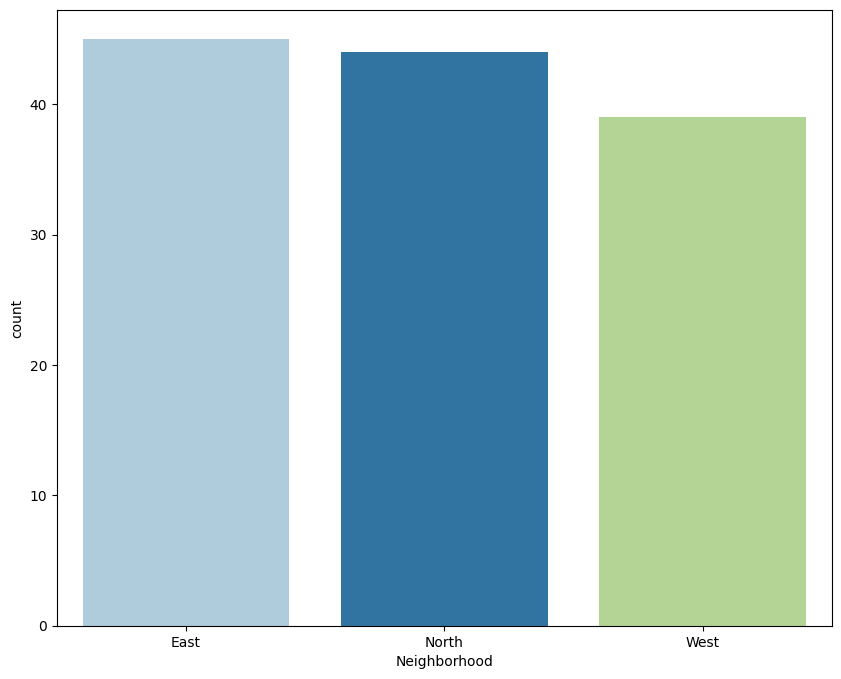

In [ ]:
# Puede encontrar todas las paletas de colores disponibles en https://matplotlib.org/stable/tutorials/colors/colormaps.html
fig = sns.countplot(data=hp, x='Neighborhood', palette='Paired')
plt.show()

In [ ]:
sns.kdeplot

<function seaborn.distributions.kdeplot(data=None, *, x=None, y=None, hue=None, weights=None, palette=None, hue_order=None, hue_norm=None, color=None, fill=None, multiple='layer', common_norm=True, common_grid=False, cumulative=False, bw_method='scott', bw_adjust=1, warn_singular=True, log_scale=None, levels=10, thresh=0.05, gridsize=200, cut=3, clip=None, legend=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)>

<ipython-input-6-d8b77a372079>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hp, y='Neighborhood', palette='Pastel1')


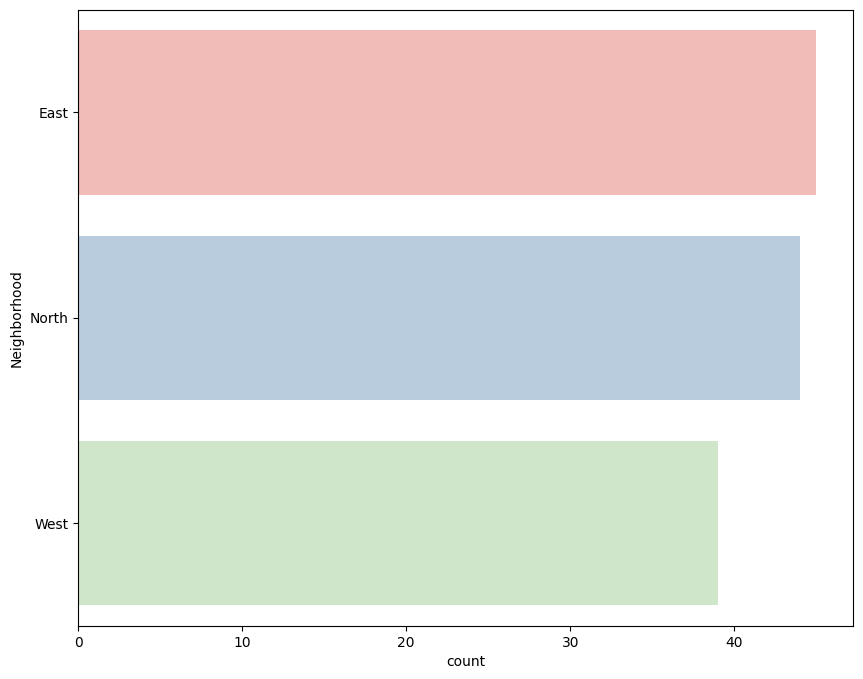

In [ ]:
# Plot horizontal
sns.countplot(data=hp, y='Neighborhood', palette='Pastel1')
plt.show()

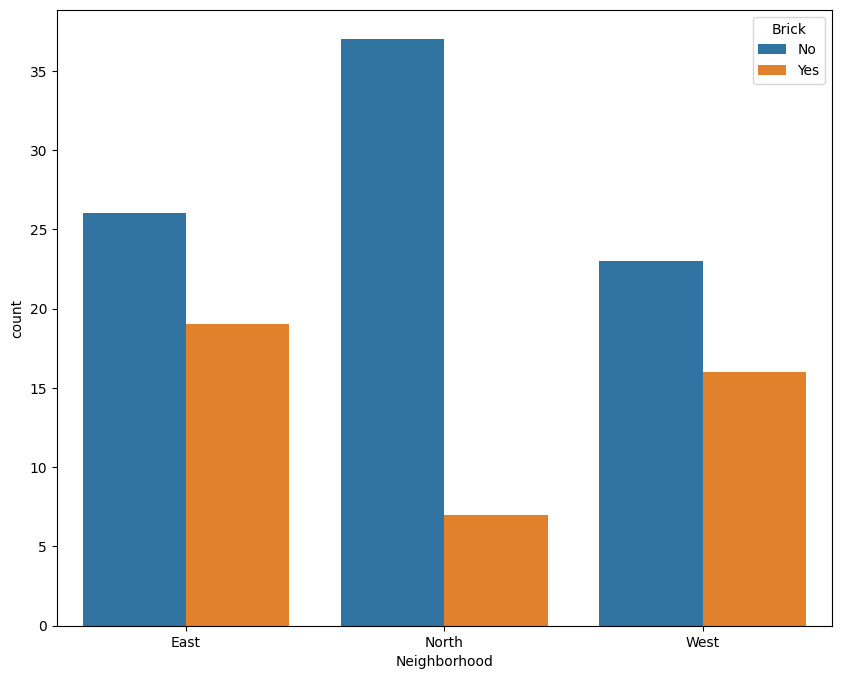

In [ ]:
# Plot cuentas de values agrupadas por una segunda variable
sns.countplot(data=hp, x='Neighborhood', hue='Brick')
plt.show()

### Analizar la distribución con histograma y KDE

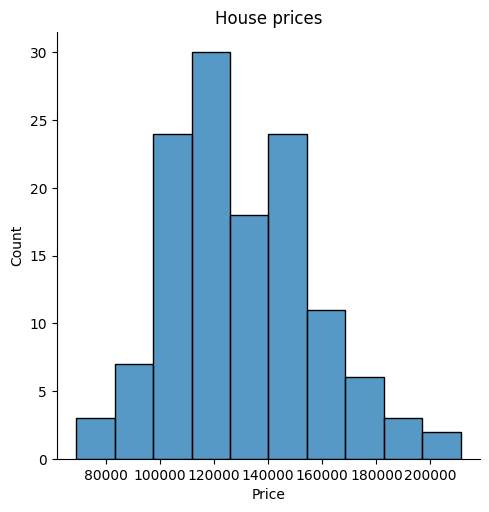

In [ ]:
# Uni-variate with histogram
sns.displot(data=hp, x="Price", kind="hist", bins=10).set(title='House prices')
plt.show()

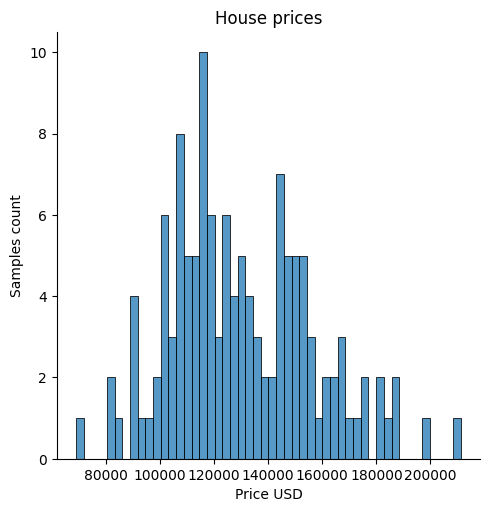

In [ ]:
# Uni-variate with histogram
sns.displot(data=hp, x="Price", kind="hist", bins=50).set(
  title='House prices',
  xlabel='Price USD',
  ylabel='Samples count'
)
plt.show()

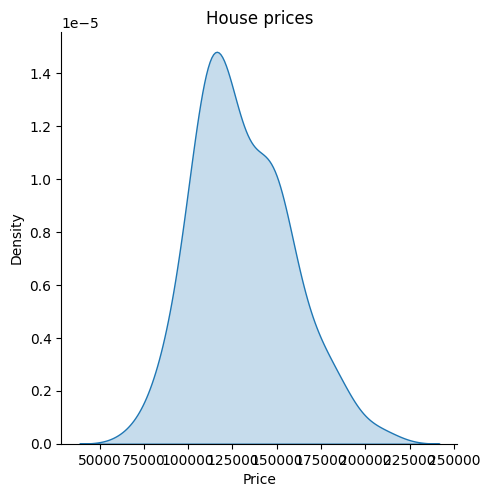

In [ ]:
# KDE
sns.displot(data=hp, x="Price", kind="kde", fill=True).set(title='House prices')
plt.show()

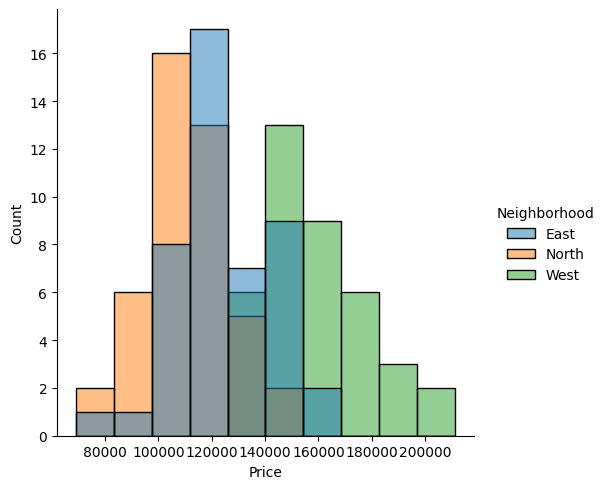

In [ ]:
# Histogram contitioned by other variable
sns.displot(data=hp, x="Price", hue="Neighborhood", kind="hist")
plt.show()

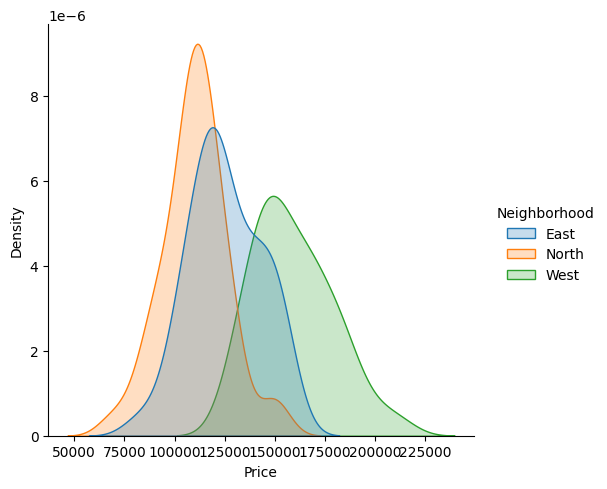

In [ ]:
# KDE contitioned by other variable
sns.displot(data=hp, x="Price", hue="Neighborhood", kind='kde', fill=True)
plt.show()

### Box plot / Violin plot

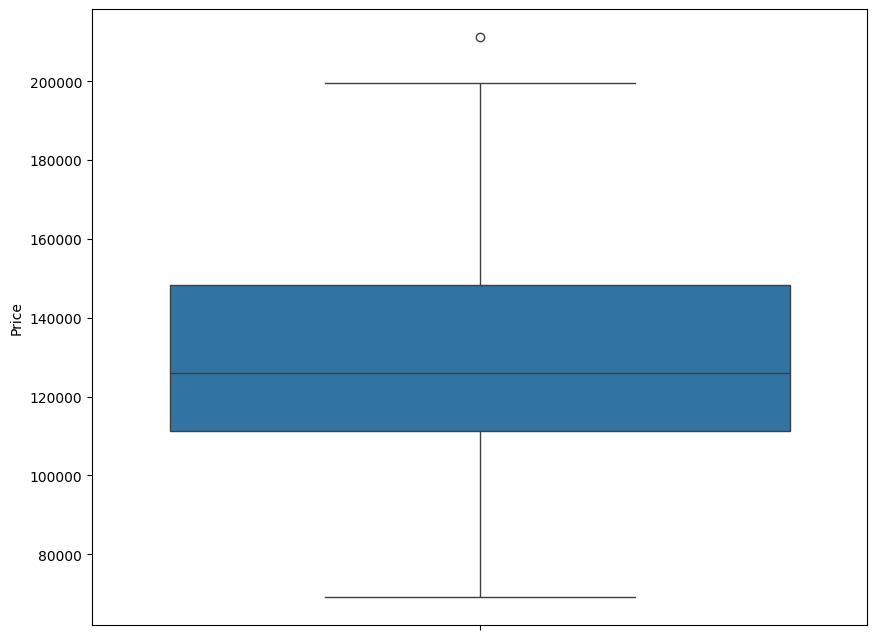

In [ ]:
sns.boxplot(data=hp, y='Price')
plt.show()

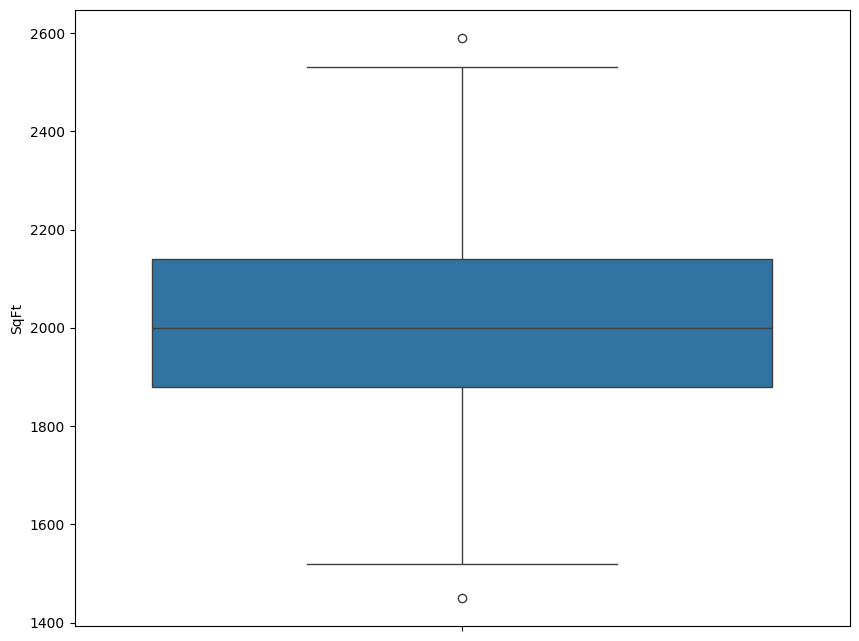

In [ ]:
sns.boxplot(data=hp, y='SqFt')
plt.show()

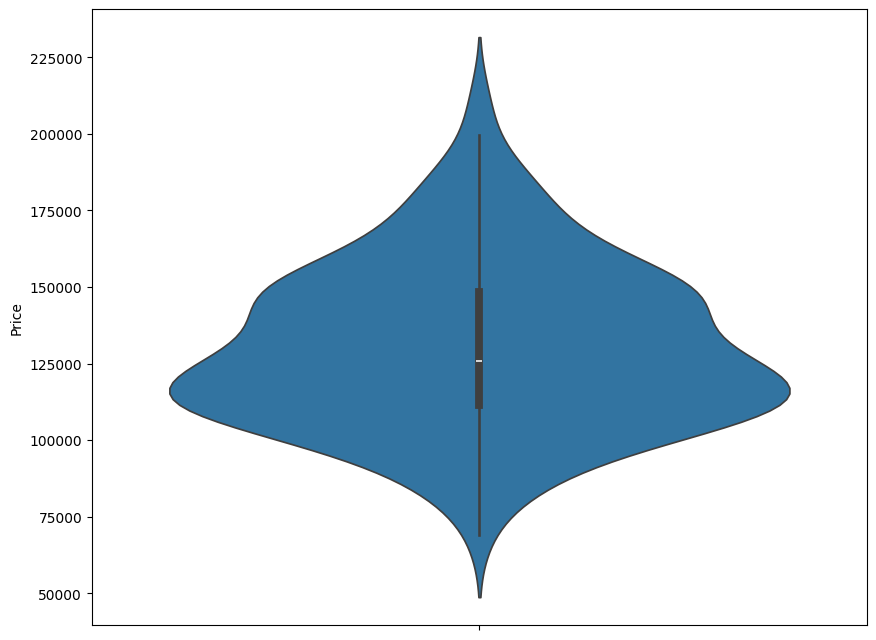

In [ ]:
sns.violinplot(data=hp, y='Price')
plt.show()

### Scatter Plot

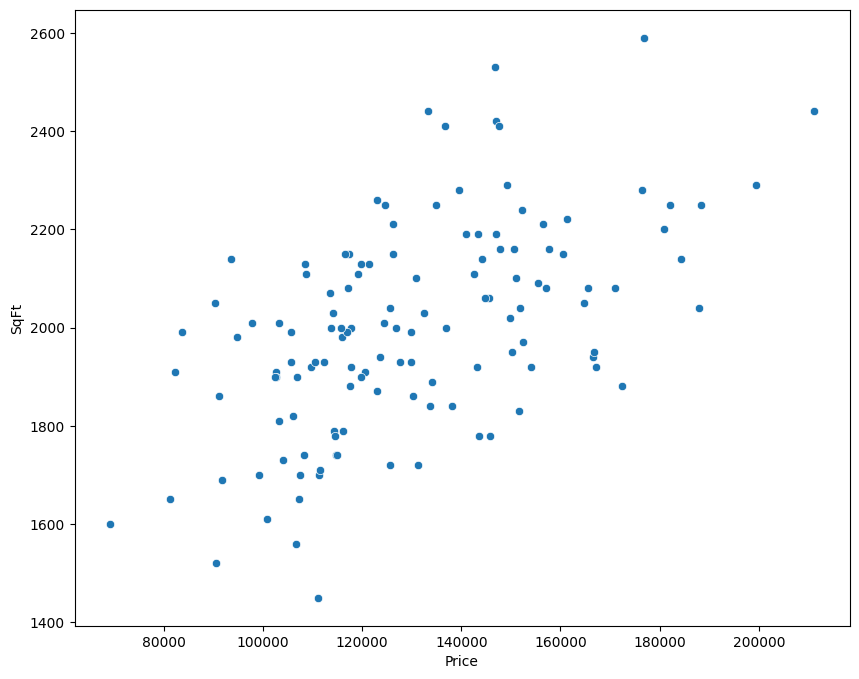

In [ ]:
sns.scatterplot(data=hp, x='Price', y='SqFt')
plt.show()

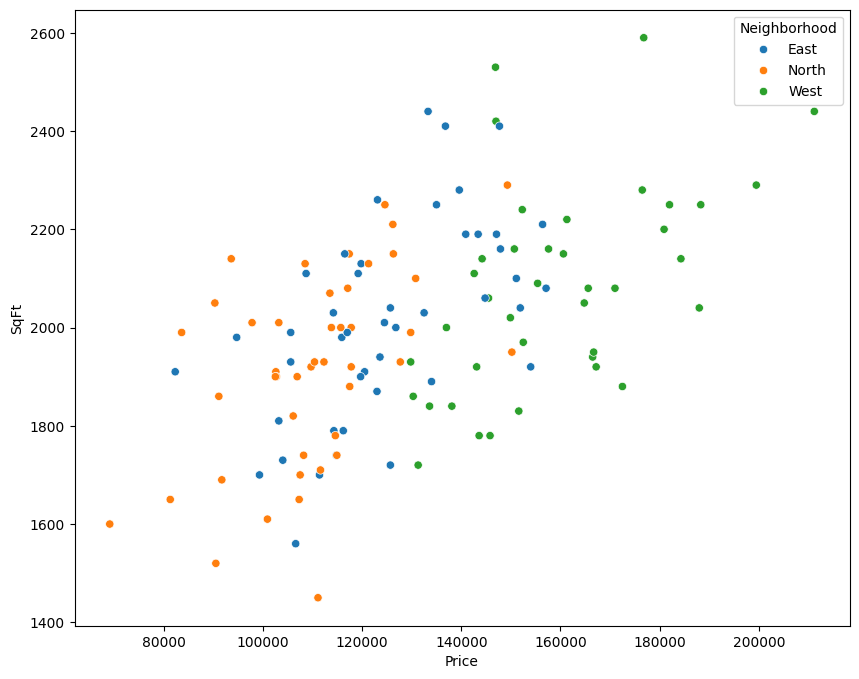

In [ ]:
sns.scatterplot(data=hp, x='Price', y='SqFt', hue='Neighborhood')
plt.show()

### Correlation and Heatmaps

In [ ]:
cols = ['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']
corr = hp[cols].corr(method='pearson')
corr

,Price,SqFt,Bedrooms,Bathrooms,Offers
Price,1.000000,0.552982,0.525926,0.523258,-0.313636
SqFt,0.552982,1.000000,0.483807,0.522745,0.336923
Bedrooms,0.525926,0.483807,1.000000,0.414556,0.114271
Bathrooms,0.523258,0.522745,0.414556,1.000000,0.143793
Offers,-0.313636,0.336923,0.114271,0.143793,1.000000


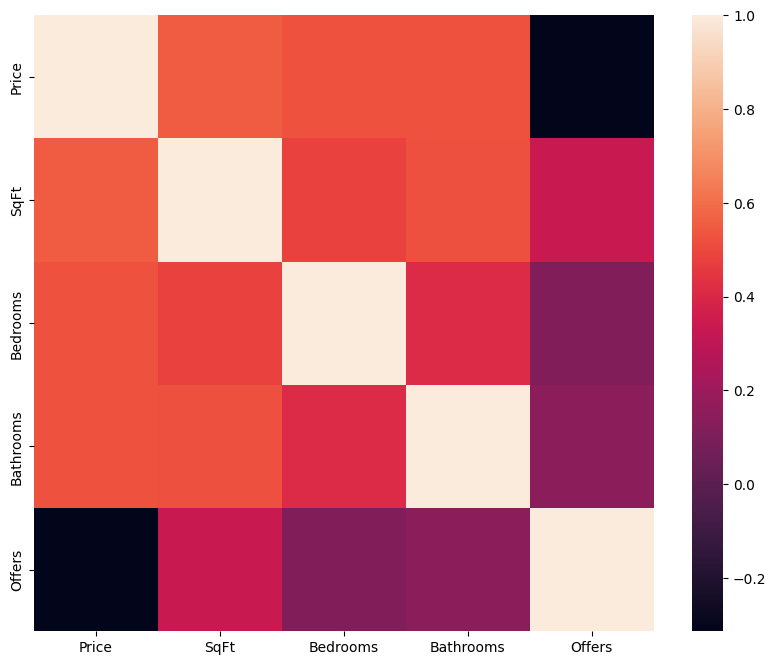

In [ ]:
sns.heatmap(corr)
plt.show()

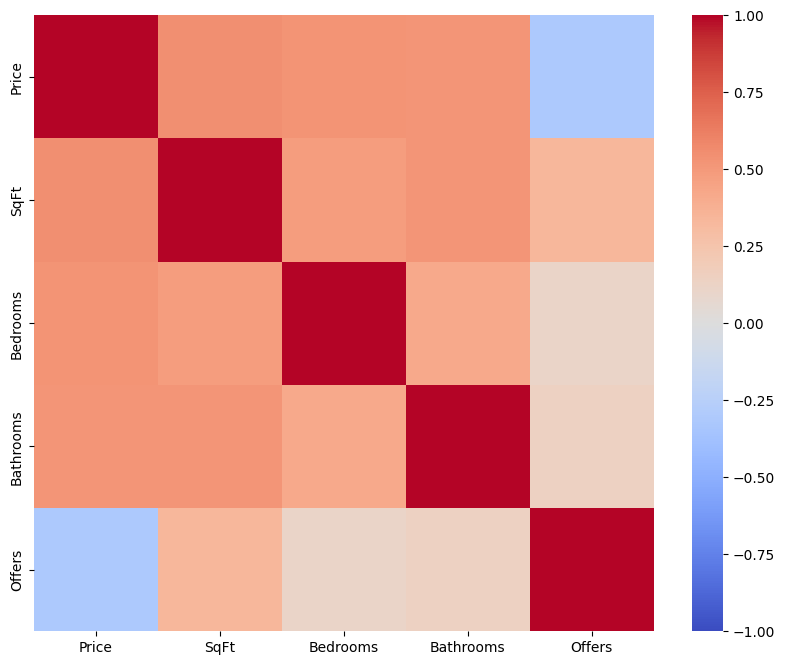

In [ ]:
sns.heatmap(corr, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

## Volviendo a nuestro problema...

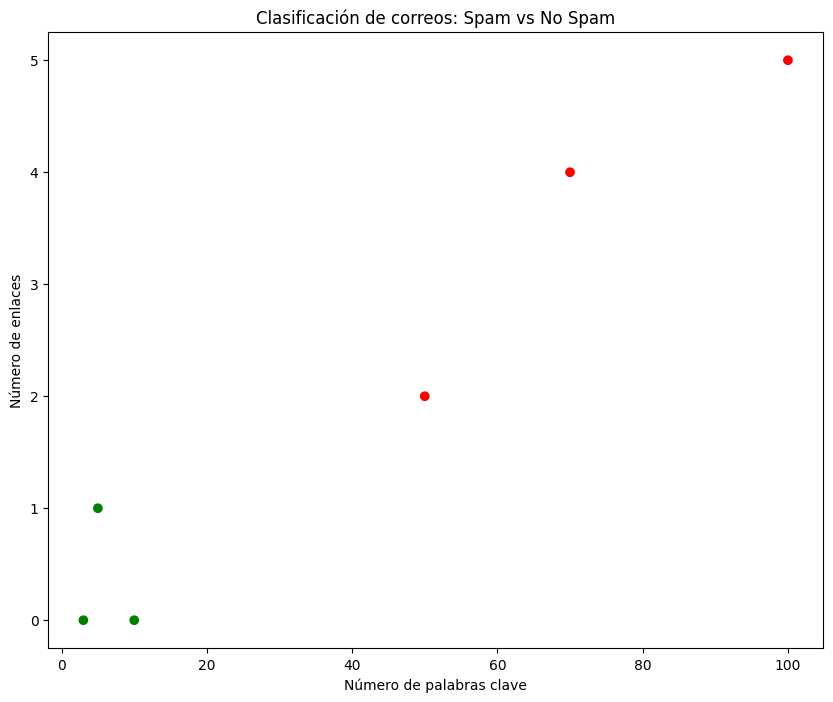

In [ ]:
#Visualización del dataset
import matplotlib.pyplot as plt

# Visualizamos el dataset
plt.scatter(df['num_palabras_clave'], df['num_enlaces'], c=['green' if x == 'no' else 'red' for x in df['es_spam']])
plt.title("Clasificación de correos: Spam vs No Spam")
plt.xlabel("Número de palabras clave")
plt.ylabel("Número de enlaces")
plt.show()

### Modelo de Clasificación
Para resolver este problema, podemos entrenar un modelo de clasificación, como un árbol de decisión o logistic regression, que aprenda a predecir si un correo es spam o no con base en las características del correo.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Preparamos los datos
X = df[['num_palabras_clave', 'num_enlaces']]
y = df['es_spam'].map({'no': 0, 'sí': 1})  # Convertimos a valores numéricos

# Dividimos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamos el modelo
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

# Evaluamos el modelo
accuracy = modelo.score(X_test, y_test)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 100.00%


## Otro caso...

Ejemplo para clasificación de datos

---

Dataset tomado de https://www.kaggle.com/datasets/mathchi/diabetes-data-set


**PASO 1: Importar las librerías necesarias.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import  f1_score, recall_score, precision_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**PASO 2: Cargar el dataset.**

In [ ]:
pip install kaggle

In [ ]:
  !kaggle datasets download -d mathchi/diabetes-data-set

Dataset URL: https://www.kaggle.com/datasets/mathchi/diabetes-data-set
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 16.2MB/s]


In [ ]:
import os

# Lista los archivos en el directorio de trabajo
print(os.listdir())

['.config', 'diabetes-data-set.zip', 'sample_data']


In [ ]:
import zipfile
# Verificar si el archivo .zip está en el directorio
if 'diabetes-data-set.zip' in os.listdir():
    # Descomprimir el archivo .zip
    with zipfile.ZipFile('diabetes-data-set.zip', 'r') as zip_ref:
        zip_ref.extractall()
        print("Archivo descomprimido exitosamente.")
else:
    print("El archivo 'diabetes-data-set.zip' no se encontró.")

Archivo descomprimido exitosamente.


In [ ]:
# Cargar dataset
# Pregnancies: Number of times pregnant
# Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# BloodPressure: Diastolic blood pressure (mm Hg)
# SkinThickness: Triceps skin fold thickness (mm)
# Insulin: 2-Hour serum insulin (mu U/ml)
# BMI: Body mass index (weight in kg/(height in m)^2)
# DiabetesPedigreeFunction: Diabetes pedigree function
# Age: Age (years)
# Outcome: Class variable (0 or 1)
# Cargar dataset
# Descripción de las columnas del dataset:
# Pregnancies: Number of times pregnant
# Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# BloodPressure: Diastolic blood pressure (mm Hg)
# SkinThickness: Triceps skin fold thickness (mm)
# Insulin: 2-Hour serum insulin (mu U/ml)
# BMI: Body mass index (weight in kg/(height in m)^2)
# DiabetesPedigreeFunction: Diabetes pedigree function
# Age: Age (years)
# Outcome: Class variable (0 or 1)

# Nombre del archivo .csv después de la descarga y descompresión
db_name = 'diabetes.csv'

# Cargar el archivo CSV en un DataFrame de pandas
dataf = pd.read_csv(db_name)

# Convertimos los datos en una matriz de valores numéricos
data = dataf.values

# Separar las variables de entrada (X) y la variable de salida (y)
x = data[:, :-1]  # Todas las columnas excepto la última (entradas)
y = data[:, -1]   # Última columna (variable de salida: Outcome)

# Obtener la dimensión del dataset
n, d = x.shape  # n = número de muestras, d = número de características

# Mostramos la dimensión del dataset y las primeras filas de X y y
print(f"Dimensiones del dataset: {n} muestras, {d} características.")
print("Primeras 5 muestras de X (entradas):")
print(x[:5])
print("Primeras 5 muestras de y (salida):")
print(y[:5])

Dimensiones del dataset: 768 muestras, 8 características.
Primeras 5 muestras de X (entradas):
[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]
Primeras 5 muestras de y (salida):
[1. 0. 1. 0. 1.]


**PASO 3: Creación del modelo de predicción.**

In [ ]:
# Dividir Training/Testing
porc_test= 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= porc_test)
print("%d datos para training" %x_train.shape[0])
print("%d datos para testing" %x_test.shape[0])

# Crear el modelo
modelo= LogisticRegression()

614 datos para training
154 datos para testing


**PASO 4: Entrenamiento del modelo**

In [ ]:
modelo.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**PASO 5: Validación del modelo.**

In [ ]:
y_pred_train= modelo.predict(x_train) # el modelo predice para cada dato una de las clases conocidas (0 o 1)
print("\nTrain   Accuracy: %.2f" % accuracy_score(y_train, y_pred_train ))
y_pred= modelo.predict(x_test)
print("\nTest    Accuracy: %.2f" % accuracy_score(y_test, y_pred ))


Train   Accuracy: 0.78

Test    Accuracy: 0.76


**PASO 6: Utilizar el modelo.**

In [ ]:
# Preguntar al modelo por un nuevo caso.
v=np.array([2,138,62,35,0,33.6,0.127,47])
pred=modelo.predict(v.reshape(1, -1))
print("\nPara el nuevo caso la clasificación es:",pred)


Para el nuevo caso la clasificación es: [0.]


**<h2 style="color: #007ACC;">Créditos</h2>**

---

**Docente:** Andrés Felipe Florez Olivera

**Universidad Pedagógica y Tecnológica de Colombia** - *Diplomado en Data Science: Aplicaciones con Machine Learning - Cohorte II - 2024*


---